In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('F:/DS/mines-vs-rocks deep_learning assignment-20200702T094428Z-001/mines-vs-rocks deep_learning assignment/sonar.all-data.csv')
print(df.shape)
df.head()

(207, 61)


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [5]:
# Reading Dataset
def read_dataset():
    df = pd.read_csv('F:/DS/mines-vs-rocks deep_learning assignment-20200702T094428Z-001/mines-vs-rocks deep_learning assignment/sonar.all-data.csv')
    print(df.shape)
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    # Encoding
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return(X,Y)

# One Hot Encoder
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [6]:
# Read the dataset
X, Y = read_dataset()

(207, 61)
(207, 60)


In [7]:
print(Y.shape)

(207, 2)


In [10]:
# Shuffle the dataset
X, Y = shuffle(X, Y, random_state=1)

In [11]:
# Split into train and test data
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=415)

In [12]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(144, 60)
(144, 2)
(63, 60)
(63, 2)


In [13]:
# Parameters and variables for tensors
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X.shape[1]
print('n_dim = ', n_dim)
n_class = 2
model_path = 'F:/DS/mines-vs-rocks deep_learning assignment-20200702T094428Z-001/mines-vs-rocks deep_learning assignment'

n_dim =  60


In [14]:
# Multilayer Perception
# Number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class]) # output of model

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
# Define the model
def multilayer_perceptron(x, weights, biases):
    
    # Hidden layer 1 with sigmoid activation function
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden layer 2 with sigmoid activation function
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Hidden layer 3 with sigmoid activation function
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    # Hidden layer 4 with relu activation function
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

In [19]:
# Define weights and biases for each layer
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])), # 60x60
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [20]:
# Initialize all variables
init = tf.global_variables_initializer()

In [21]:
# Saver object to save the model
saver = tf.train.Saver()

In [22]:
# Call the model
y = multilayer_perceptron(x, weights, biases)

In [23]:
# Define the cost/loss function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [24]:
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [25]:
# Tensorflow Session
sess = tf.Session()
sess.run(init)

In [28]:
# Calculate the cost and accuracy of each epoch
mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict = {x: train_X, y_: train_y})
    cost = sess.run(cost_function, feed_dict = {x: train_X, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1)) # Difference between actual and model output
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict = {x: test_X})
    mse = tf.reduce_mean(tf.square(pred_y - test_y)) # Mean square error
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict = {x: train_X, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print('Epoch: ', epoch, ' - Cost: ', cost, ' - MSE: ', mse_, ' - Train Accuracy: ', accuracy)
    
save_path = saver.save(sess, model_path)
print('Model saved in file: %s' % save_path)

Epoch:  0  - Cost:  8.176793  - MSE:  182.8612669298056  - Train Accuracy:  0.5277778
Epoch:  1  - Cost:  7.6064944  - MSE:  58.68898792060962  - Train Accuracy:  0.4722222
Epoch:  2  - Cost:  0.87715185  - MSE:  2.0491164998457614  - Train Accuracy:  0.4722222
Epoch:  3  - Cost:  0.7034348  - MSE:  2.0519046633670426  - Train Accuracy:  0.5416667
Epoch:  4  - Cost:  0.69974536  - MSE:  1.9154560240304888  - Train Accuracy:  0.5069444
Epoch:  5  - Cost:  0.69367325  - MSE:  2.0526229822552504  - Train Accuracy:  0.5486111
Epoch:  6  - Cost:  0.6906821  - MSE:  1.946427168013456  - Train Accuracy:  0.5277778
Epoch:  7  - Cost:  0.69729465  - MSE:  1.783115805358666  - Train Accuracy:  0.5625
Epoch:  8  - Cost:  0.7293047  - MSE:  1.9440029074711906  - Train Accuracy:  0.4722222
Epoch:  9  - Cost:  0.6954564  - MSE:  2.1601878110248838  - Train Accuracy:  0.5416667
Epoch:  10  - Cost:  0.6913184  - MSE:  2.0225485337296925  - Train Accuracy:  0.5347222
Epoch:  11  - Cost:  0.6845008  - M

Epoch:  93  - Cost:  0.57331055  - MSE:  3.7400344230789413  - Train Accuracy:  0.7152778
Epoch:  94  - Cost:  0.72074825  - MSE:  3.0949068642958713  - Train Accuracy:  0.5694444
Epoch:  95  - Cost:  0.8736558  - MSE:  6.955225012201791  - Train Accuracy:  0.4722222
Epoch:  96  - Cost:  0.6377379  - MSE:  1.4096204147169626  - Train Accuracy:  0.7152778
Epoch:  97  - Cost:  0.5888938  - MSE:  1.586881229060529  - Train Accuracy:  0.7013889
Epoch:  98  - Cost:  0.57389516  - MSE:  1.8732509794717302  - Train Accuracy:  0.7569444
Epoch:  99  - Cost:  0.5606593  - MSE:  2.213814891673135  - Train Accuracy:  0.7222222
Epoch:  100  - Cost:  0.55039793  - MSE:  2.9228778313478587  - Train Accuracy:  0.7708333
Epoch:  101  - Cost:  0.5662293  - MSE:  2.913963470695128  - Train Accuracy:  0.6944444
Epoch:  102  - Cost:  0.6856715  - MSE:  5.154981555856194  - Train Accuracy:  0.5416667
Epoch:  103  - Cost:  0.7424686  - MSE:  2.411249969227573  - Train Accuracy:  0.5555556
Epoch:  104  - Cost

Epoch:  186  - Cost:  0.5466066  - MSE:  4.8917047431025455  - Train Accuracy:  0.6944444
Epoch:  187  - Cost:  0.62497497  - MSE:  3.1354101077360244  - Train Accuracy:  0.6666667
Epoch:  188  - Cost:  0.7897249  - MSE:  8.74883560585026  - Train Accuracy:  0.5138889
Epoch:  189  - Cost:  0.562768  - MSE:  1.520679709189551  - Train Accuracy:  0.7986111
Epoch:  190  - Cost:  0.52622277  - MSE:  1.9151083750911053  - Train Accuracy:  0.7430556
Epoch:  191  - Cost:  0.52501446  - MSE:  2.9545340064529078  - Train Accuracy:  0.7569444
Epoch:  192  - Cost:  0.5172927  - MSE:  2.892034836212853  - Train Accuracy:  0.7222222
Epoch:  193  - Cost:  0.5947241  - MSE:  5.9215366341668885  - Train Accuracy:  0.6666667
Epoch:  194  - Cost:  0.54769415  - MSE:  2.62651535093039  - Train Accuracy:  0.7152778
Epoch:  195  - Cost:  0.6060984  - MSE:  5.712500044682063  - Train Accuracy:  0.6319444
Epoch:  196  - Cost:  0.4801144  - MSE:  2.4812493932280746  - Train Accuracy:  0.7847222
Epoch:  197  -

Epoch:  278  - Cost:  0.44036353  - MSE:  2.3654982367120594  - Train Accuracy:  0.7986111
Epoch:  279  - Cost:  0.50096834  - MSE:  4.271433147230585  - Train Accuracy:  0.7083333
Epoch:  280  - Cost:  0.50409484  - MSE:  2.733082661255418  - Train Accuracy:  0.75
Epoch:  281  - Cost:  0.628659  - MSE:  6.284745541625288  - Train Accuracy:  0.6180556
Epoch:  282  - Cost:  0.45129648  - MSE:  1.82228909691674  - Train Accuracy:  0.7916667
Epoch:  283  - Cost:  0.43426186  - MSE:  2.7528000192857323  - Train Accuracy:  0.8611111
Epoch:  284  - Cost:  0.44176105  - MSE:  2.9349357748894818  - Train Accuracy:  0.7916667
Epoch:  285  - Cost:  0.5700375  - MSE:  6.3514097183877505  - Train Accuracy:  0.6597222
Epoch:  286  - Cost:  0.5226003  - MSE:  2.2923245880510263  - Train Accuracy:  0.75
Epoch:  287  - Cost:  0.54174066  - MSE:  3.9550499220357755  - Train Accuracy:  0.6527778
Epoch:  288  - Cost:  0.39506334  - MSE:  2.7046666851186236  - Train Accuracy:  0.875
Epoch:  289  - Cost:  

Epoch:  370  - Cost:  0.28546292  - MSE:  3.484276471607817  - Train Accuracy:  0.8680556
Epoch:  371  - Cost:  0.45161253  - MSE:  5.52573861042928  - Train Accuracy:  0.75
Epoch:  372  - Cost:  1.6022282  - MSE:  7.421505999473378  - Train Accuracy:  0.6041667
Epoch:  373  - Cost:  1.1995978  - MSE:  12.796858116321964  - Train Accuracy:  0.4722222
Epoch:  374  - Cost:  0.74700683  - MSE:  1.286115297714381  - Train Accuracy:  0.4722222
Epoch:  375  - Cost:  0.7252775  - MSE:  1.2782476774606768  - Train Accuracy:  0.4722222
Epoch:  376  - Cost:  0.70696104  - MSE:  1.3003585367264954  - Train Accuracy:  0.47916666
Epoch:  377  - Cost:  0.6903398  - MSE:  1.351927958462289  - Train Accuracy:  0.5
Epoch:  378  - Cost:  0.672989  - MSE:  1.453205019631347  - Train Accuracy:  0.5
Epoch:  379  - Cost:  0.65151477  - MSE:  1.6555314121975773  - Train Accuracy:  0.5069444
Epoch:  380  - Cost:  0.6193813  - MSE:  2.1190492734310187  - Train Accuracy:  0.5138889
Epoch:  381  - Cost:  0.58240

Epoch:  462  - Cost:  0.30256748  - MSE:  4.2965626207054655  - Train Accuracy:  0.8263889
Epoch:  463  - Cost:  0.3747218  - MSE:  7.300077967207968  - Train Accuracy:  0.8194444
Epoch:  464  - Cost:  0.38774624  - MSE:  4.445091683055651  - Train Accuracy:  0.7986111
Epoch:  465  - Cost:  0.5626617  - MSE:  10.515233692149765  - Train Accuracy:  0.6388889
Epoch:  466  - Cost:  0.44798076  - MSE:  2.3995475856403425  - Train Accuracy:  0.7708333
Epoch:  467  - Cost:  0.44484583  - MSE:  3.216405652443856  - Train Accuracy:  0.7777778
Epoch:  468  - Cost:  0.30949622  - MSE:  3.2206975017112507  - Train Accuracy:  0.8888889
Epoch:  469  - Cost:  0.29957247  - MSE:  4.717536059379362  - Train Accuracy:  0.9236111
Epoch:  470  - Cost:  0.31862062  - MSE:  4.699365010779838  - Train Accuracy:  0.8125
Epoch:  471  - Cost:  0.44501197  - MSE:  9.171122283966683  - Train Accuracy:  0.7083333
Epoch:  472  - Cost:  0.33463615  - MSE:  3.838783344467142  - Train Accuracy:  0.8055556
Epoch:  473

Epoch:  554  - Cost:  0.53945947  - MSE:  2.947810316766421  - Train Accuracy:  0.75
Epoch:  555  - Cost:  0.44185442  - MSE:  5.624231105828629  - Train Accuracy:  0.8819444
Epoch:  556  - Cost:  0.41920125  - MSE:  6.909331890943134  - Train Accuracy:  0.9097222
Epoch:  557  - Cost:  0.39344832  - MSE:  7.341771647107726  - Train Accuracy:  0.9166667
Epoch:  558  - Cost:  0.36661917  - MSE:  8.983176699040722  - Train Accuracy:  0.9166667
Epoch:  559  - Cost:  0.34868544  - MSE:  8.59310317128002  - Train Accuracy:  0.9166667
Epoch:  560  - Cost:  0.33884457  - MSE:  10.7449937218178  - Train Accuracy:  0.9166667
Epoch:  561  - Cost:  0.34197807  - MSE:  7.971231036354347  - Train Accuracy:  0.9027778
Epoch:  562  - Cost:  0.3714543  - MSE:  14.121415520212794  - Train Accuracy:  0.8541667
Epoch:  563  - Cost:  0.47239447  - MSE:  4.726871604672353  - Train Accuracy:  0.7638889
Epoch:  564  - Cost:  0.3206252  - MSE:  9.295197119196676  - Train Accuracy:  0.9027778
Epoch:  565  - Cos

Epoch:  646  - Cost:  0.31078067  - MSE:  3.4922504220133863  - Train Accuracy:  0.8819444
Epoch:  647  - Cost:  0.3835182  - MSE:  4.542958137618021  - Train Accuracy:  0.8333333
Epoch:  648  - Cost:  0.27383626  - MSE:  4.305746131275776  - Train Accuracy:  0.875
Epoch:  649  - Cost:  0.33341163  - MSE:  5.935547004598655  - Train Accuracy:  0.8402778
Epoch:  650  - Cost:  0.27770445  - MSE:  5.286550252830059  - Train Accuracy:  0.875
Epoch:  651  - Cost:  0.41984674  - MSE:  8.657311069618096  - Train Accuracy:  0.7222222
Epoch:  652  - Cost:  0.38318804  - MSE:  5.1125203669201635  - Train Accuracy:  0.8125
Epoch:  653  - Cost:  0.53743947  - MSE:  9.78872959616519  - Train Accuracy:  0.6111111
Epoch:  654  - Cost:  0.2525708  - MSE:  4.3117471789671145  - Train Accuracy:  0.9305556
Epoch:  655  - Cost:  0.25171608  - MSE:  4.723336861573196  - Train Accuracy:  0.8888889
Epoch:  656  - Cost:  0.2598977  - MSE:  6.465918584389511  - Train Accuracy:  0.9027778
Epoch:  657  - Cost:  

Epoch:  738  - Cost:  0.29227248  - MSE:  7.031276305401749  - Train Accuracy:  0.8402778
Epoch:  739  - Cost:  0.6775126  - MSE:  13.053049702178866  - Train Accuracy:  0.6111111
Epoch:  740  - Cost:  0.3184636  - MSE:  4.154397191776276  - Train Accuracy:  0.8541667
Epoch:  741  - Cost:  0.43637133  - MSE:  5.528229403854215  - Train Accuracy:  0.75
Epoch:  742  - Cost:  0.19425903  - MSE:  4.5145276914896195  - Train Accuracy:  0.9583333
Epoch:  743  - Cost:  0.17719299  - MSE:  4.961442831080236  - Train Accuracy:  0.9444444
Epoch:  744  - Cost:  0.16566783  - MSE:  5.485551499264634  - Train Accuracy:  0.9444444
Epoch:  745  - Cost:  0.15794629  - MSE:  6.119379788478026  - Train Accuracy:  0.9583333
Epoch:  746  - Cost:  0.15004002  - MSE:  6.637459241432934  - Train Accuracy:  0.9444444
Epoch:  747  - Cost:  0.14677057  - MSE:  7.409291690603655  - Train Accuracy:  0.9583333
Epoch:  748  - Cost:  0.1418523  - MSE:  7.757409168224371  - Train Accuracy:  0.9444444
Epoch:  749  - C

Epoch:  830  - Cost:  0.12583277  - MSE:  9.274537777266767  - Train Accuracy:  0.9583333
Epoch:  831  - Cost:  0.1801262  - MSE:  10.202285042175134  - Train Accuracy:  0.9236111
Epoch:  832  - Cost:  0.19023229  - MSE:  9.828290388916015  - Train Accuracy:  0.9027778
Epoch:  833  - Cost:  0.5550217  - MSE:  14.097350244677965  - Train Accuracy:  0.7361111
Epoch:  834  - Cost:  0.74774206  - MSE:  10.090021863583415  - Train Accuracy:  0.7569444
Epoch:  835  - Cost:  1.3087045  - MSE:  19.872748403601648  - Train Accuracy:  0.4722222
Epoch:  836  - Cost:  0.66402745  - MSE:  1.8760963393046697  - Train Accuracy:  0.5902778
Epoch:  837  - Cost:  0.3658004  - MSE:  1.6967142463337  - Train Accuracy:  0.8680556
Epoch:  838  - Cost:  0.31014225  - MSE:  2.984639357525899  - Train Accuracy:  0.8611111
Epoch:  839  - Cost:  0.38625884  - MSE:  2.166263869783343  - Train Accuracy:  0.8402778
Epoch:  840  - Cost:  0.21522106  - MSE:  2.974452554078678  - Train Accuracy:  0.9583333
Epoch:  841

Epoch:  922  - Cost:  0.3165485  - MSE:  8.180117543723963  - Train Accuracy:  0.8194444
Epoch:  923  - Cost:  0.22031647  - MSE:  7.852829414649001  - Train Accuracy:  0.8958333
Epoch:  924  - Cost:  0.44249535  - MSE:  9.388170344366506  - Train Accuracy:  0.75
Epoch:  925  - Cost:  0.14336501  - MSE:  6.805635619924397  - Train Accuracy:  0.9513889
Epoch:  926  - Cost:  0.13501681  - MSE:  6.960459659856031  - Train Accuracy:  0.9583333
Epoch:  927  - Cost:  0.10975113  - MSE:  7.787020926093253  - Train Accuracy:  0.9791667
Epoch:  928  - Cost:  0.11741367  - MSE:  7.865750276097143  - Train Accuracy:  0.9652778
Epoch:  929  - Cost:  0.11384024  - MSE:  8.56153444080652  - Train Accuracy:  0.9722222
Epoch:  930  - Cost:  0.14003235  - MSE:  8.536706765590651  - Train Accuracy:  0.9513889
Epoch:  931  - Cost:  0.107738525  - MSE:  9.05702997181085  - Train Accuracy:  0.9722222
Epoch:  932  - Cost:  0.13597015  - MSE:  9.002601354847307  - Train Accuracy:  0.9513889
Epoch:  933  - Co

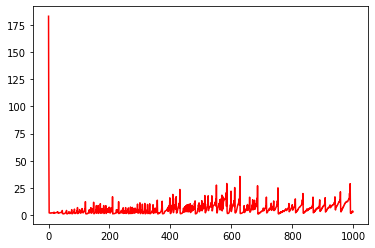

<function matplotlib.pyplot.show(*args, **kw)>

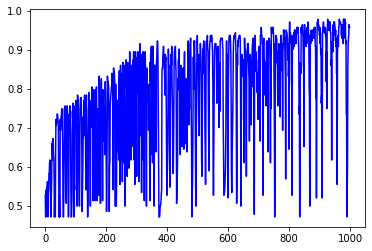

In [33]:
# Plot MSE and accuracy graph
plt.plot(mse_history, 'r')
plt.show()

plt.plot(accuracy_history, 'b')
plt.show


In [31]:
# Print the final accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ', (sess.run(accuracy, feed_dict = {x: test_X, y_: test_y})))


Test Accuracy:  0.82539684


In [32]:
# Print the final mean square error
pred_y = sess.run(y, feed_dict={x: test_X})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

MSE: 2.9759
